### Getting data from yann lecunn dataset

Yann Lecunn dataset is of the format idx and split across 4 files
1. train-images.idx3-ubyte : training image set which consists of 60000 images each image is represented by a 28*28 array
2. train-labels.idx1-ubyte : training label set which consists of 60000 labels 
3. t10k-images.idx3-ubyte : test image set which consists of 10000 images each image is represented by a 28*28
4. t10k-labels.idx1-ubyte : training label set which consists of 10000 labels

In [1]:
import idx2numpy
import seaborn as sns

#### Extract Training data

In [2]:
X_train_3D = idx2numpy.convert_from_file('train-images.idx3-ubyte')
X_train = X_train_3D.flatten().reshape(60000,784)

y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [3]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
X_train.shape

(60000, 784)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_train.shape

(60000,)

#### Extract Test data

In [7]:
X_test_3D = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
X_test =  X_test_3D.flatten().reshape(10000,784)

y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [8]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
X_test.shape

(10000, 784)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
y_test.shape

(10000,)

#### Function to display a digit image from one 1-d representation of pixels

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def display(image,label):
    """image is a 1*784 numpy array"""
   
    image = image.reshape(28,28)
    sns.heatmap(image,linewidth=0,xticklabels=False,yticklabels=False)
    #plt.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    plt.title("Image Representation for %d" %(label))
    plt.show()

##### Displaying a set of digits

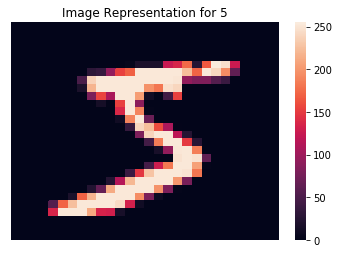

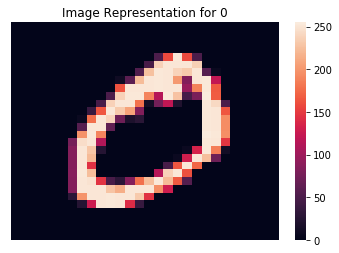

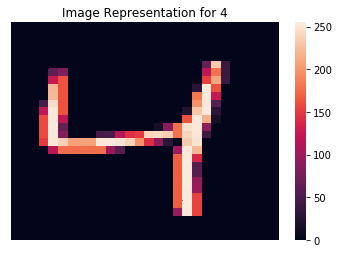

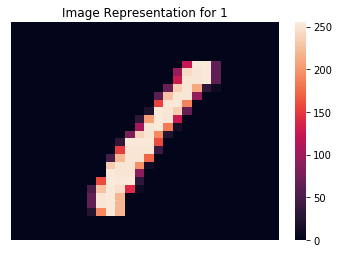

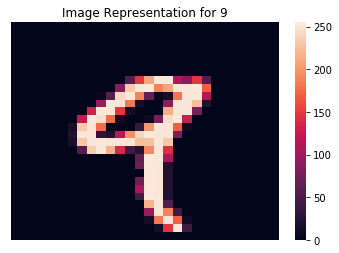

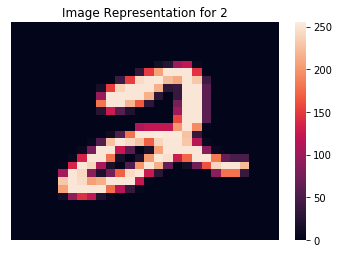

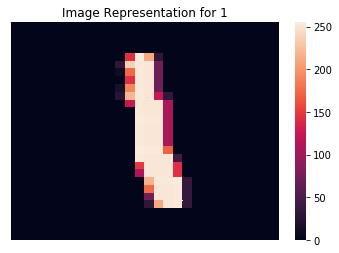

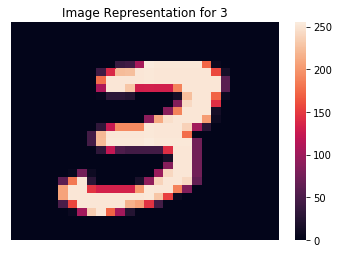

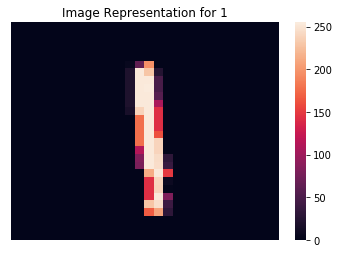

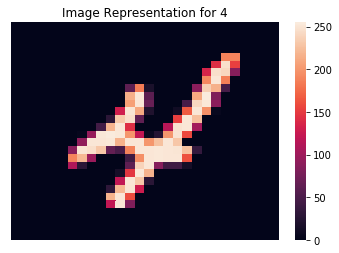

In [13]:
for i in range(10):
    display(X_train[i],y_train[i])

# KNN classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)

y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

##### Calculate Cross Validation Score

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.97090582,  0.96974849,  0.97034555])

y_train_pred is the predicted values in the train set such that the model has never seen the data before

In [16]:
y_train_pred

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**Create a confusion matrix for cross validation prediction & actual labels**

In [18]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_train, y_train_pred)

In [19]:
confusionMatrix

array([[5884,    3,    4,    0,    1,    4,   17,    1,    5,    4],
       [   1, 6706,   10,    1,    3,    1,    3,   10,    3,    4],
       [  41,   47, 5716,   18,   10,    5,    9,   83,   18,   11],
       [   7,   12,   29, 5891,    1,   72,    6,   38,   49,   26],
       [   3,   50,    1,    1, 5636,    0,   15,   16,    3,  117],
       [  15,    8,    4,   61,    6, 5218,   56,    6,   17,   30],
       [  21,   11,    1,    0,    7,   22, 5853,    0,    3,    0],
       [   3,   58,   12,    2,   11,    2,    0, 6109,    4,   64],
       [  17,   68,    8,   68,   29,   82,   26,   13, 5476,   64],
       [  13,    9,    5,   33,   51,   13,    5,   76,   13, 5731]], dtype=int64)

**Plot the Confusion matrix showing the diagonals.**

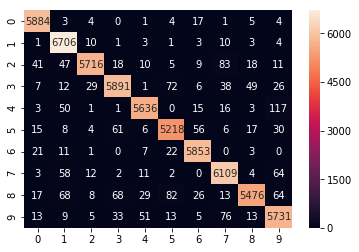

In [21]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [22]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

In [23]:
import numpy as np
#import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)

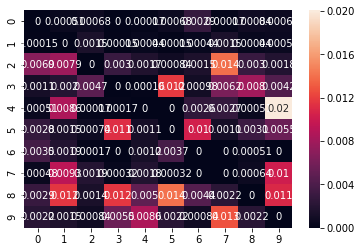

In [24]:
ax = sns.heatmap(norm_conf_mx,annot=True)

**Plot Confusion Matrix against Test data**

In [27]:
y_test_pred = knn_clf.predict(X_test)
y_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [28]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
       [   0, 1132,    2,    0,    0,    0,    1,    0,    0,    0],
       [  10,    5,  995,    2,    1,    0,    0,   16,    3,    0],
       [   0,    1,    3,  974,    1,   14,    1,    7,    4,    5],
       [   1,    5,    0,    0,  950,    0,    4,    3,    0,   19],
       [   4,    0,    0,    9,    2,  862,    7,    1,    3,    4],
       [   4,    2,    0,    0,    3,    3,  946,    0,    0,    0],
       [   0,   17,    4,    0,    3,    0,    0,  994,    0,   10],
       [   5,    2,    4,   14,    5,   11,    4,    4,  920,    5],
       [   3,    4,    2,    7,    9,    4,    1,   10,    1,  968]], dtype=int64)

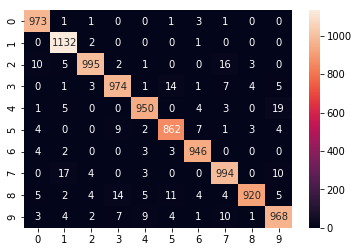

In [29]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [30]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

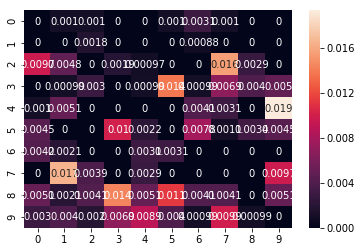

In [31]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.97140000000000004

## Evaluating the performance on scaled data

In [34]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [36]:
y_train_pred_scaled = cross_val_predict(knn_clf, X_train_scaled, y_train, cv=3)
y_train_pred_scaled

array([3, 0, 4, ..., 5, 6, 8], dtype=uint8)

**Calculate Scross Validation Score**

In [38]:
cross_val_score(knn_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.94276145,  0.94414721,  0.94429164])

In [39]:
confusionMatrix = confusion_matrix(y_train, y_train_pred_scaled)
confusionMatrix

array([[5823,    4,   17,    7,    0,   19,   41,    4,    5,    3],
       [   2, 6664,   19,   12,    7,    3,   14,   11,    6,    4],
       [  65,   51, 5543,   89,   30,    9,   49,   52,   43,   27],
       [  13,   20,   54, 5768,    5,   96,    7,   69,   69,   30],
       [   4,   62,   46,    7, 5431,   16,   25,   37,   14,  200],
       [  23,   11,   11,  149,   10, 5011,   94,   14,   48,   50],
       [  57,   13,   15,    5,   11,   51, 5759,    1,    6,    0],
       [  10,   51,   27,   15,   61,    2,    0, 5871,    4,  224],
       [  47,   75,   37,  105,   37,  180,   37,   20, 5239,   74],
       [  18,    8,   19,   46,  111,   12,    1,  204,   15, 5515]], dtype=int64)

**Plot the Confusion matrix showing the diagonals.**

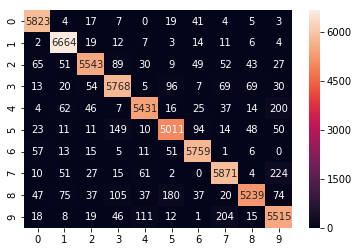

In [40]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [43]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

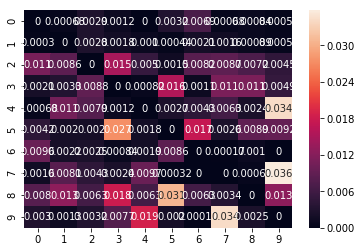

In [44]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [47]:
knn_clf.fit(X_train_scaled,y_train)
y_test_pred=knn_clf.predict(X_test)

In [48]:
y_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**Plot Confusion Matrix against Test data**

In [49]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[973,   0,   0,   1,   0,   1,   3,   0,   2,   0],
       [ 17, 965,  12,   4,   0,   0,   7,   3, 126,   1],
       [ 93,   0, 863,  10,   0,   0,   3,   2,  58,   3],
       [ 96,   0,  18, 689,   0,   7,   0,   6, 187,   7],
       [222,   1,   0,   0, 551,   0,  11,   6, 101,  90],
       [130,   0,   5,  20,   0, 534,  15,   0, 184,   4],
       [ 83,   0,   1,   0,   0,   4, 843,   0,  27,   0],
       [ 42,   0,  23,   2,   1,   0,   0, 859,  55,  46],
       [143,   0,   2,   0,   1,   4,   2,   4, 817,   1],
       [ 71,   0,   0,   5,   1,   2,   0,  20, 101, 809]], dtype=int64)

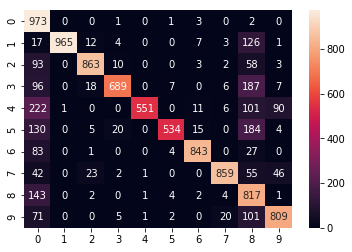

In [50]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [52]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

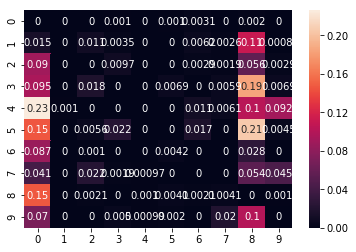

In [53]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [54]:
accuracy_score(y_test, y_test_pred)

0.7903